# Limpieza de datos (Data cleansing)

### Agenda
1. Estandarización de NA´s.
2. Identificación de patrones.
3. Métodos para tratamientos de NA's.
    1.  Eliminación
    2.  Imputación
        1. Medias
        2. Computación de valores aleatorios
        3. Modelos predictivos
        4. Comparación predictiva de medias
        5. Automámica
4. Tratamiento de valores duplicados
5. Tratamiento de Outliers
    1. Identificación
    2. Imputación de datos atípicos

### 1. Estandarización de NA's

Cargamos los paquetes necesarios

In [ ]:
require(dplyr)
require(mice)
require(VIM)
require(Hmisc)

Leemos la base de datos

In [14]:
data1R <- read.csv("missing-data.csv", row.names=NULL)
head(data1R, 5)

X,Income,Phone_type,Car_type
1,89800,Android,Luxury
2,47500,Android,Non-Luxury
3,45000,iPhone,Luxury
4,44700,,Luxury
5,59500,iPhone,Luxury


Ahora estandarizamos los NA's

In [15]:
data1R$Income[data1R$Income == 0]          <- NA
data1R$Phone_type[data1R$Phone_type == ""] <- NA
data1R$Car_type[data1R$Car_type == ""]     <- NA

head(data1R, 5)

X,Income,Phone_type,Car_type
1,89800,Android,Luxury
2,47500,Android,Non-Luxury
3,45000,iPhone,Luxury
4,44700,NA,Luxury
5,59500,iPhone,Luxury


## 2. Identificación de patrones

Primero contamos el número de NA´s

In [17]:
colSums(is.na(data1R))
summarise_all(data1R, funs(sum(is.na(.))))

X     Income Phone_type   Car_type 
         0          5          2          0

X,Income,Phone_type,Car_type
0,5,2,0


Leemos la base de datos

In [18]:
data2R       <- read.csv("housing-with-missing-value.csv")
housing.data <- data2R

Graficamos

,X.1,X,crim,zn,indus,chas,nox,rm,age,dis,tax,b,lstat,medv,rad,ptratio,
431,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
35,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
35,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,40,80


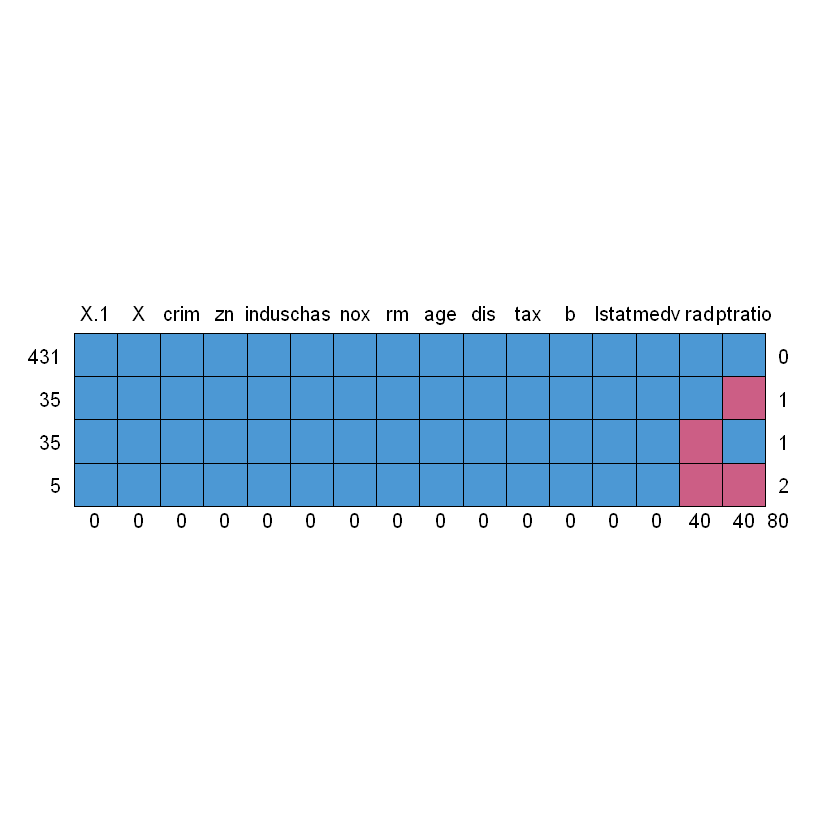

In [19]:
md.pattern(housing.data)


 Variables sorted by number of missings: 
 Variable      Count
      rad 0.07905138
  ptratio 0.07905138
      X.1 0.00000000
        X 0.00000000
     crim 0.00000000
       zn 0.00000000
    indus 0.00000000
     chas 0.00000000
      nox 0.00000000
       rm 0.00000000
      age 0.00000000
      dis 0.00000000
      tax 0.00000000
        b 0.00000000
    lstat 0.00000000
     medv 0.00000000


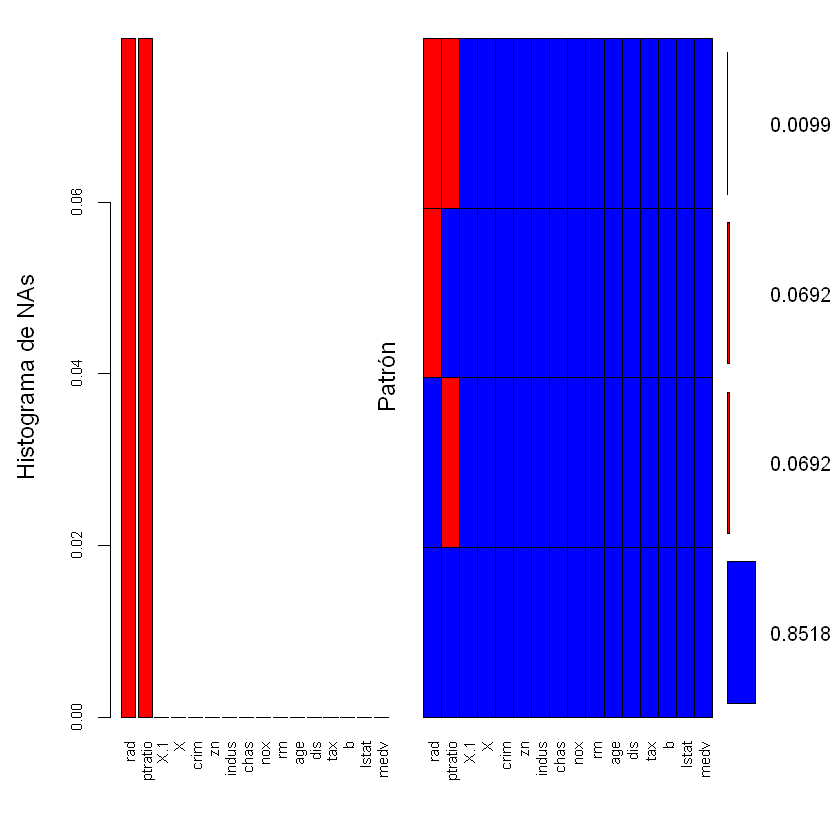

In [20]:
aggr(housing.data,
     col= c('blue', 'red'),
     numbers = TRUE, 
     sortVars = TRUE,
     labels = names(housing.data),
     cex.axis = 0.75,
     gap = 1,
     ylab = c("Histograma de NAs", "Patrón")
) 

## 3. Métodos para tratamientos de NA's: Eliminación

Es posible que eliminar los Na, la forma más simple de hacerlo es eliminar todas las filas que contengan algún valor nulo.

In [21]:
ingresos <- na.omit(data1R)
head(ingresos, 5)

,X,Income,Phone_type,Car_type
1,1,89800,Android,Luxury
2,2,47500,Android,Non-Luxury
3,3,45000,iPhone,Luxury
5,5,59500,iPhone,Luxury
7,7,63300,iPhone,Non-Luxury


In [22]:
ingresos <- data1R[complete.cases(data1R),]
head(ingresos, 5)

,X,Income,Phone_type,Car_type
1,1,89800,Android,Luxury
2,2,47500,Android,Non-Luxury
3,3,45000,iPhone,Luxury
5,5,59500,iPhone,Luxury
7,7,63300,iPhone,Non-Luxury


Aunque tambien existe la opción de eliminar las filas que tengan un valor nulo en una variable concreta.

In [23]:
ingresos <- data1R[!is.na(data1R$Income),]
colSums(is.na(ingresos))
head(ingresos, 5)

X     Income Phone_type   Car_type 
         0          0          2          0

X,Income,Phone_type,Car_type
1,89800,Android,Luxury
2,47500,Android,Non-Luxury
3,45000,iPhone,Luxury
4,44700,NA,Luxury
5,59500,iPhone,Luxury


Támbien existe la posibilidad de que alguna variable tenga tantos NA's que sea más conveniente eliminarla.

In [24]:
ingresos$Phone_type <- NULL
head(ingresos, 5)

X,Income,Car_type
1,89800,Luxury
2,47500,Non-Luxury
3,45000,Luxury
4,44700,Luxury
5,59500,Luxury


## 3. Métodos para tratamientos de NA's: Imputación por medias

Calculamos la media y la desviación estandar para ver la importancia de na.rm=T

In [25]:
mean(data1R$Income)
mean(data1R$Income, na.rm=T)

sd(data1R$Income)
sd(data1R$Income, na.rm=T)

[1] NA

[1] 65763.64

[1] NA

[1] 26715.87

Reemplazamos los valores faltantes por la media

In [26]:
ingresos             <- data1R
ingresos$Income.mean <- ifelse(is.na(ingresos$Income), 
                           mean(ingresos$Income, na.rm=TRUE),
                           ingresos$Income
                           )
head(ingresos,5)

X,Income,Phone_type,Car_type,Income.mean
1,89800,Android,Luxury,89800
2,47500,Android,Non-Luxury,47500
3,45000,iPhone,Luxury,45000
4,44700,NA,Luxury,44700
5,59500,iPhone,Luxury,59500


Calculamos la media y la desviación estandar nuevamente

In [27]:
mean(ingresos$Income.mean)
sd(ingresos$Income.mean)

[1] 65763.64

[1] 24010.01

Miramos el summary

In [28]:
housing.data <- data2R
summary(housing.data$ptratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  12.60   17.40   19.10   18.47   20.20   22.00      40 

Tambien existe un paquete llamado *Hmisc* que permite relizar esto sin necesidad de crear una función, además permite realizar un cambio en el criterio de imputación

In [29]:
housing.data$ptratio <- impute(housing.data$ptratio, mean)
summary(housing.data$ptratio)


 40 values imputed to 18.4676 



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   18.60   18.47   20.20   22.00 

También se puede imputar con la mediana y otras medidas

In [30]:
housing.data <- data2R
housing.data$ptratio <- impute(housing.data$ptratio, median)
summary(housing.data$ptratio)


 40 values imputed to 19.1 



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   19.10   18.52   20.20   22.00 

También se puede imputar con un valor fijo

In [31]:
housing.data <- data2R
housing.data$ptratio <- impute(housing.data$ptratio, 18)
summary(housing.data$ptratio)


 40 values imputed to 18 



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   18.60   18.43   20.20   22.00 

## 3. Métodos para tratamientos de NA's: Imputación por cómputo de valores aleatorios

Se usa cuanto tengo valores faltantes, tanto en variables númericas como categoricas, de forma que por medio de un muestreo aleatorio se reeemplazan los valores faltantes. Para esto es conveniente construir una función.

In [32]:
random.impute        <- function(x) {
    missing          <- is.na(x)
    n.missing        <- sum(missing)
    x.obs            <- x[!missing]
    imputed          <- x
    imputed[missing] <- sample(x.obs, n.missing, replace=TRUE)
    return(imputed)
}

Primero se se construye un vector con los valores nulos **missing**, luego los sumamos para saber cuales valores hay que reemplazar **n.missing**, luego  se hace un vector de los valores no nulos **x.obs**, **imputed** devuelve por defecto los valores que habian en los valores no nulos y finalmente **imputed[missing]** permite reemplazar aletoriamente los valores nulos con valores observados.

In [33]:
ingresos                    <- data1R
ingresos$Phone_type.imputed <- random.impute(ingresos$Phone_type)
colSums(is.na(ingresos))

X             Income         Phone_type           Car_type 
                 0                  5                  2                  0 
Phone_type.imputed 
                 0

Cuando los datos que se tienen en la base de datos fueron tomados de forma totalmente aleatoria, es posible optar por realizar una imputación aleatoria de todos los datos de la variable. Para esto creamos otra variable.

In [34]:
random.impute.data.frame <- function(dataframe, cols){
  names                  <- names(dataframe)
  for(col in cols){
    name                 <- paste(names[col], "imputed", sep = ".")
    dataframe[name]      = random.impute(dataframe[,col])
  }
  dataframe
}

In [35]:
ingresos <- data1R
ingresos <- random.impute.data.frame(ingresos, c(1,2))
colSums(is.na(ingresos))

X         Income     Phone_type       Car_type      X.imputed 
             0              5              2              0              0 
Income.imputed 
             0

## 3. Métodos para tratamientos de NA's: Imputación con modelos predictivos

En ocasiones cuando un método para reemplazar valores aleatorios no es el adecuado, por ejemplo cuando el uso de la media y mediana genera mucho ruido, es usual utilizar modelos predictivos para generar los valores faltantes.

In [36]:
housing.data <- data2R
head(housing.data, 5)
dim(housing.data)

X.1,X,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
1,1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


[1] 506  16

In [37]:
colSums(is.na(housing.data))

X.1       X    crim      zn   indus    chas     nox      rm     age     dis 
      0       0       0       0       0       0       0       0       0       0 
    rad     tax ptratio       b   lstat    medv 
     40       0      40       0       0       0

Para hacer esto se hace uso del paquete **mice**

* m: Es el número de imputaciones que quiero hacer
* maxit: Es el número maximo de iteraciones
* seed: Es la semilla; todos los métodos de reemplazo del paquete son aleatorios, y la semilla va cambiando si esta no se fija, cambiando así los valores con los que se imputo.
* method: Metodo de reemplazo
    + pmm - comparación predictiva de medias
    + logreg - regresión logistica
    + polyreg - regresión logística politómica
    + polr - modelo de probabilidades proporcionales
    
**nota:** Para generar números pseudo aleatorios se utiliza un generador lineal congruencial

Con columns señalamos las columnas que continen los valores faltantes

In [38]:
columns <- c("ptratio", "rad")

## 3. Métodos para tratamientos de NA's: Imputación por comparación predictiva de medias

In [39]:
imputed_data <- mice(housing.data[,names(housing.data) %in% columns],
                     m = 5, 
                     maxit = 50, 
                     method = "pmm",
                     seed = 2018)


 iter imp variable
  1   1  rad  ptratio
  1   2  rad  ptratio
  1   3  rad  ptratio
  1   4  rad  ptratio
  1   5  rad  ptratio
  2   1  rad  ptratio
  2   2  rad  ptratio
  2   3  rad  ptratio
  2   4  rad  ptratio
  2   5  rad  ptratio
  3   1  rad  ptratio
  3   2  rad  ptratio
  3   3  rad  ptratio
  3   4  rad  ptratio
  3   5  rad  ptratio
  4   1  rad  ptratio
  4   2  rad  ptratio
  4   3  rad  ptratio
  4   4  rad  ptratio
  4   5  rad  ptratio
  5   1  rad  ptratio
  5   2  rad  ptratio
  5   3  rad  ptratio
  5   4  rad  ptratio
  5   5  rad  ptratio
  6   1  rad  ptratio
  6   2  rad  ptratio
  6   3  rad  ptratio
  6   4  rad  ptratio
  6   5  rad  ptratio
  7   1  rad  ptratio
  7   2  rad  ptratio
  7   3  rad  ptratio
  7   4  rad  ptratio
  7   5  rad  ptratio
  8   1  rad  ptratio
  8   2  rad  ptratio
  8   3  rad  ptratio
  8   4  rad  ptratio
  8   5  rad  ptratio
  9   1  rad  ptratio
  9   2  rad  ptratio
  9   3  rad  ptratio
  9   4  rad  ptratio
  9   5  rad

In [40]:
summary(imputed_data)

Class: mids
Number of multiple imputations:  5 
Imputation methods:
    rad ptratio 
  "pmm"   "pmm" 
PredictorMatrix:
        rad ptratio
rad       0       1
ptratio   1       0


Despues de generar los valores de forma aleatoria, se reemplazan los NA's por los valores generados

In [41]:
housing.data$ptratio <- mice::complete(imputed_data)$ptratio
housing.data$rad <- mice::complete(imputed_data)$rad
colSums(is.na(housing.data))
anyNA(housing.data)

X.1       X    crim      zn   indus    chas     nox      rm     age     dis 
      0       0       0       0       0       0       0       0       0       0 
    rad     tax ptratio       b   lstat    medv 
      0       0       0       0       0       0

[1] FALSE

## 3. Métodos para tratamientos de NA's: Imputación automática

Es posible utilizar el paquete **hmisc** para que este elija de forma automatica el método e impute los NA's.

In [42]:
impute_arg <- aregImpute(~ptratio + rad, data = housing.data, n.impute = 5)

impute_arg

impute_arg$imputed$rad

Iteration 5 



Multiple Imputation using Bootstrap and PMM

aregImpute(formula = ~ptratio + rad, data = housing.data, n.impute = 5)

n: 506 	p: 2 	Imputations: 5  	nk: 3 

Number of NAs:
ptratio     rad 
      0       0 

        type d.f.
ptratio    s   NA
rad        s   NA

Transformation of Target Variables Forced to be Linear

R-squares for Predicting Non-Missing Values for Each Variable
Using Last Imputations of Predictors
named numeric(0)

NULL

## 4. Tratamiento de valores duplicados

En ocasiones encontramos valores duplicados, o registros duplicados en una valiable, lo primero es verificar si hay registros duplicados en el data frame.

In [43]:
family.salary <- c(40000, 60000, 50000, 80000, 60000, 70000, 60000)
family.size   <- c(4, 3, 2, 2, 3, 4, 3)
family.car    <- c("Lujo", "Compacto", "Utilitario", "Lujo", 
               "Compacto", "Compacto", "Compacto")
family        <- data.frame(family.salary, family.size, family.car)
family

family.salary,family.size,family.car
40000,4,Lujo
60000,3,Compacto
50000,2,Utilitario
80000,2,Lujo
60000,3,Compacto
70000,4,Compacto
60000,3,Compacto


In [44]:
duplicated(family)
family[duplicated(family),]

[1] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE

,family.salary,family.size,family.car
5,60000,3,Compacto
7,60000,3,Compacto


Ahora cuando se encuentran valores duplicados en un data frame, estos se pueden eliminar utilizando la función unique.

In [45]:
family.unique <- unique(family)
family.unique

,family.salary,family.size,family.car
1,40000,4,Lujo
2,60000,3,Compacto
3,50000,2,Utilitario
4,80000,2,Lujo
6,70000,4,Compacto


## 5. Tratamiento de Outliers

En estadistica se conoce como *rango intercuartilico* $RI$ a la distancia que hay entre el cuartil uno $Q_1$ y el cuartil tres $Q_3$, y se considera un outlier un dato que este por fuera de $[Q_1-1.5RI, Q_3+1.5RI]$.

## 5. Tratamiento de Outliers: Identificación

Para identificar si hay valores atípicos en un grupo de datos, una de las herramientas más útilies es el uso de boxplots.

In [46]:
data3R     <- read.csv("ozone.csv", stringsAsFactors=F)
ozone.data <- data3R
head(ozone.data, 5)

X,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
1,1,1,4,3.01,5480,8,20,NA,NA,5000,-15,30.56,200
2,1,2,5,3.20,5660,6,NA,38,NA,NA,-14,NA,300
3,1,3,6,2.70,5710,4,28,40,NA,2693,-25,47.66,250
4,1,4,7,5.18,5700,3,37,45,NA,590,-24,55.04,100
5,1,5,1,5.34,5760,3,51,54,45.32,1450,25,57.02,60


[1] 5480 5410 5350 5480 5490 5470 5320 5420 5440 5480 5450 5500

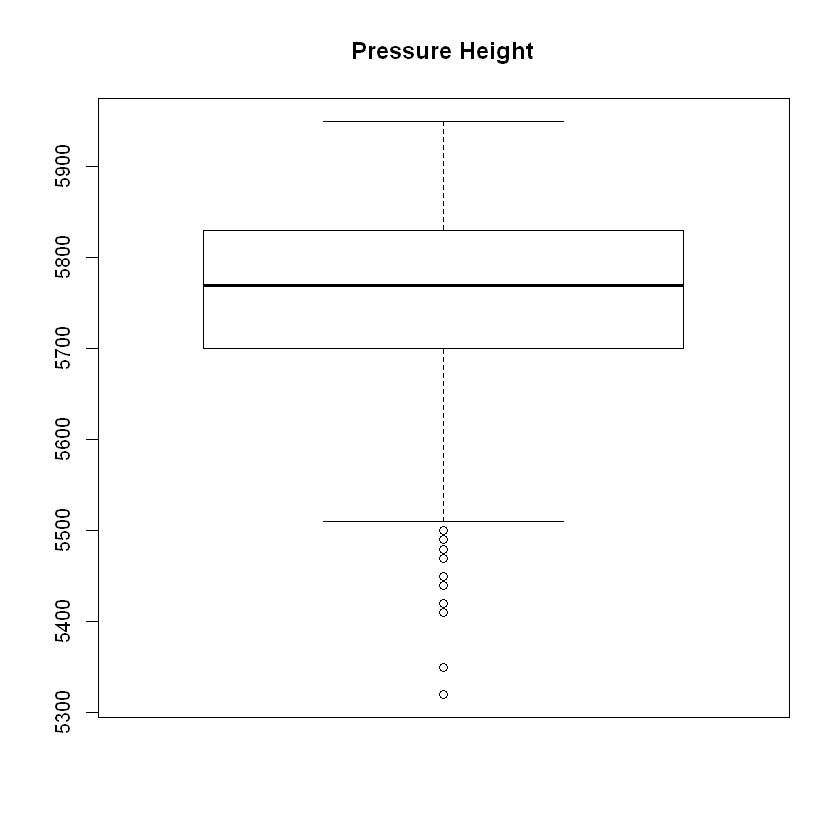

In [47]:
boxplot(ozone.data$pressure_height, 
        main = "Pressure Height",
        boxwex = 1.5)$out

El parametro out se utiliza para que aparezca cuales son las observaciones que son outliers en la variable analizada.

En ocasiones es importante observar si los outlaiers tienen relación con otra variable.

[1] 11.06  9.93 22.89 24.29 29.79

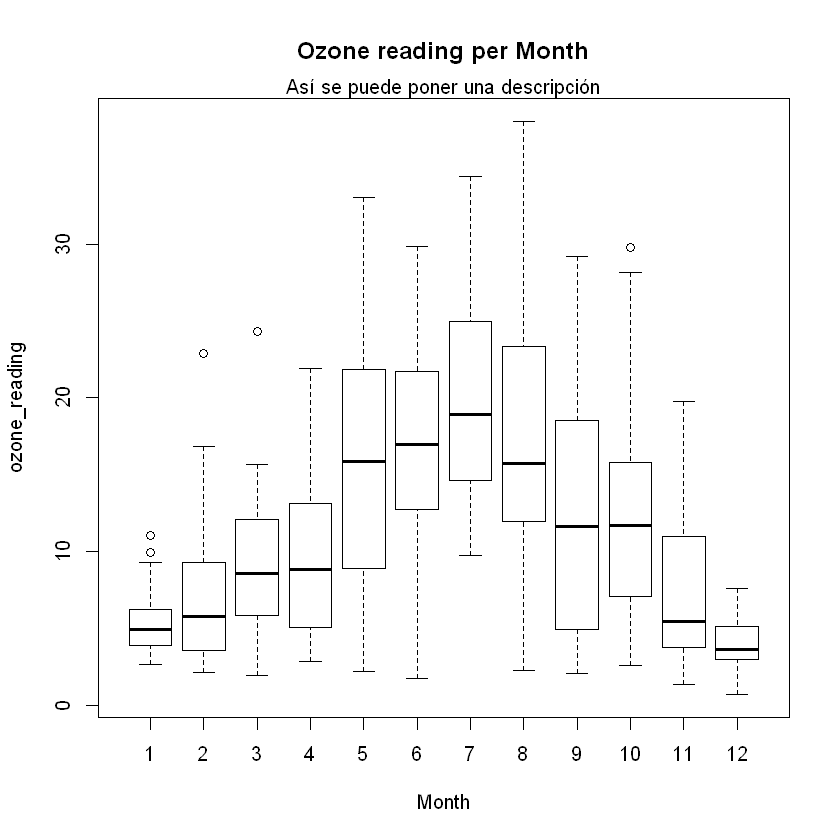

In [48]:
boxplot(ozone_reading ~Month,
        data = ozone.data,
        main = "Ozone reading per Month")$out

mtext("Así se puede poner una descripción")

## 5. Tratamiento de Outliers: Imputación de datos atípicos

Creamos una función para imputarlos

In [49]:
replace_outliers <- function(x, removeNA=TRUE){
    q1   <- quantile(x,probs=0.25, na.rm=removeNA)
    q3   <- quantile(x,probs=0.75, na.rm=removeNA)
    ri   <- q3 - q1   
    caps <- quantile(x, probs = c(.05, .95), na.rm = removeNA)  
    x[x<q1-1.5 * ri] <- caps[1]
    x[x>q3+1.5 * ri] <- caps[2]
    x
    }

In [50]:
capped_pressure_height <- replace_outliers(ozone.data$pressure_height)
head(capped_pressure_height,5)

[1] 5550 5660 5710 5700 5760

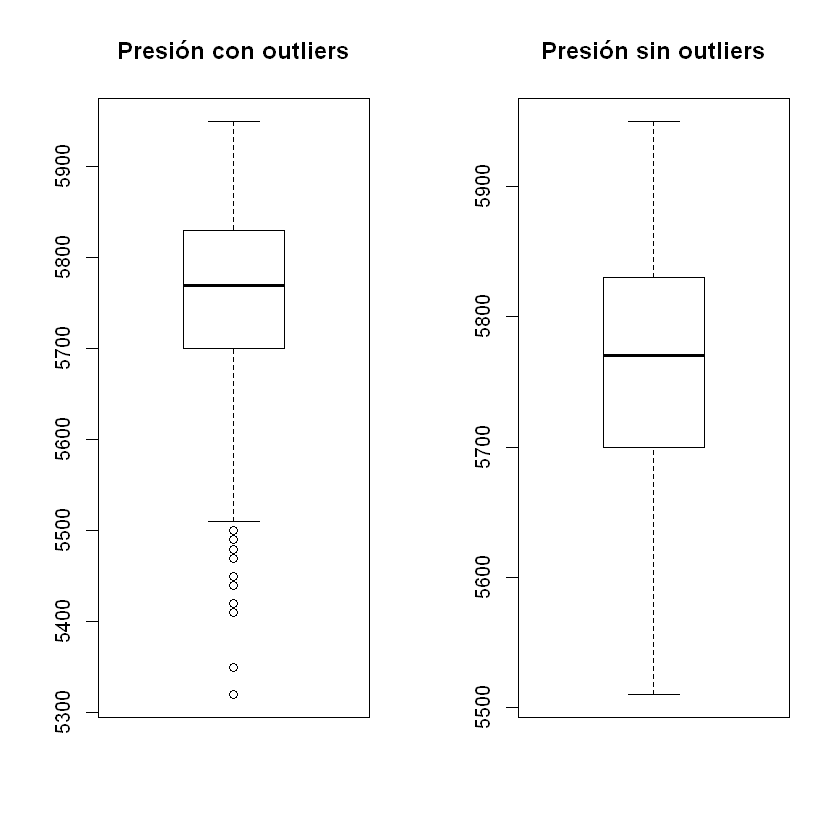

In [51]:
par(mfrow = c(1,2))
boxplot(ozone.data$pressure_height, main = "Presión con outliers")
boxplot(capped_pressure_height, main = "Presión sin outliers")